# Base de dados

In [184]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import numpy as np
import pandas as pd

data = sns.load_dataset('titanic')

data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Remover as coluna deck, alive e age

In [185]:
data = data.drop(columns=['deck', 'alive', 'age'], axis=1)

data

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,True


# Transformar em One-Hot Encoder

In [186]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

column_transformer = make_column_transformer((OneHotEncoder(), ['sex','embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']), remainder='passthrough')

column_transformer.fit_transform(data)

columns_names = column_transformer.get_feature_names_out()

data = pd.DataFrame(column_transformer.fit_transform(data), columns=columns_names)

data

,onehotencoder__sex_female,onehotencoder__sex_male,onehotencoder__embarked_C,onehotencoder__embarked_Q,onehotencoder__embarked_S,onehotencoder__embarked_nan,onehotencoder__class_First,onehotencoder__class_Second,onehotencoder__class_Third,onehotencoder__who_child,...,onehotencoder__embark_town_Queenstown,onehotencoder__embark_town_Southampton,onehotencoder__embark_town_nan,onehotencoder__alone_False,onehotencoder__alone_True,remainder__survived,remainder__pclass,remainder__sibsp,remainder__parch,remainder__fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,13.0000
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,30.0000
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,23.4500
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,30.0000


# Coluna target (y) é a "survived"


In [211]:
y = data['remainder__survived']
X = data.drop('remainder__survived', axis=1)
X

,onehotencoder__sex_female,onehotencoder__sex_male,onehotencoder__embarked_C,onehotencoder__embarked_Q,onehotencoder__embarked_S,onehotencoder__embarked_nan,onehotencoder__class_First,onehotencoder__class_Second,onehotencoder__class_Third,onehotencoder__who_child,...,onehotencoder__embark_town_Cherbourg,onehotencoder__embark_town_Queenstown,onehotencoder__embark_town_Southampton,onehotencoder__embark_town_nan,onehotencoder__alone_False,onehotencoder__alone_True,remainder__pclass,remainder__sibsp,remainder__parch,remainder__fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,13.0000
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0000
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,23.4500
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0000


# Normalização de todas as colunas (menos a coluna de Label)

In [214]:
x2 = X.values #retorna um array NumPy
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)

display(X)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.125,0.000000,0.014151
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125,0.000000,0.139136
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.000,0.000000,0.015469
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.125,0.000000,0.103644
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.000,0.000000,0.025374
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000,0.000000,0.058556
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.125,0.333333,0.045771
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,0.000000,0.058556


# Separar os dados de treinamento e teste

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

  # Treinar 2 árvores de decisão com características diferentes

In [216]:
from sklearn import tree

# Árvore 1
model1 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
model1 = model1.fit(X_train, y_train)

# Árvore 2
model2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
model2 = model2.fit(X_train, y_train)

In [217]:
# Predição e Resultados
result1 = model1.predict(X_test)
result2 = model2.predict(X_test)

acc1 = metrics.accuracy_score(y_test, result1)
acc2 = metrics.accuracy_score(y_test, result2)

show1 = round(acc1 * 100)
show2 = round(acc2 * 100)

print("{}%".format(show1))

print(list(result1))
print(list(y_test))

confusion_matrix(y_test, result1)
confusion_matrix(y_test, result2)

80%
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,

array([[99, 11],
       [19, 50]])

[Text(0.5, 0.875, 'x[13] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.25, 0.625, 'x[8] <= 0.5\ngini = 0.415\nsamples = 289\nvalue = [85, 204]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[23] <= 0.056\ngini = 0.104\nsamples = 146\nvalue = [8, 138]'),
 Text(0.0625, 0.125, 'gini = 0.172\nsamples = 63\nvalue = [6, 57]'),
 Text(0.1875, 0.125, 'gini = 0.047\nsamples = 83\nvalue = [2, 81]'),
 Text(0.375, 0.375, 'x[23] <= 0.048\ngini = 0.497\nsamples = 143\nvalue = [77, 66]'),
 Text(0.3125, 0.125, 'gini = 0.483\nsamples = 108\nvalue = [44, 64]'),
 Text(0.4375, 0.125, 'gini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.75, 0.625, 'x[23] <= 0.051\ngini = 0.273\nsamples = 423\nvalue = [354, 69]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.5\ngini = 0.193\nsamples = 314\nvalue = [280, 34]'),
 Text(0.5625, 0.125, 'gini = 0.169\nsamples = 279\nvalue = [253, 26]'),
 Text(0.6875, 0.125, 'gini = 0.353\nsamples = 35\nvalue = [27, 8]'),
 Text(0.875

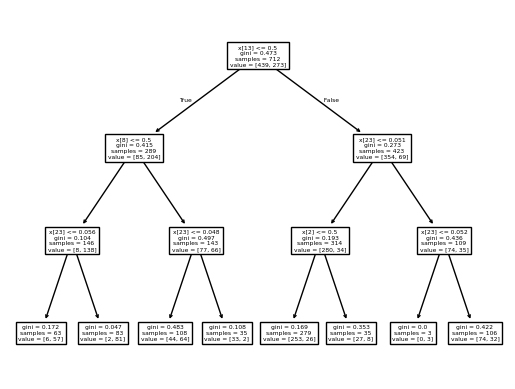

In [218]:
tree.plot_tree(model1)
tree.plot_tree(model2)

# Treinar 2 KNN com características diferentes

In [219]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

columns = len(data.columns)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

K = 5

model1Knn = KNeighborsClassifier(n_neighbors=K, metric='euclidean', algorithm='brute')
model1Knn = model1Knn.fit(X_train, y_train)

model2Knn = KNeighborsClassifier(n_neighbors=K, metric='manhattan', algorithm='brute')
model2Knn = model2Knn.fit(X_train, y_train)

In [221]:
result1Knn = model1Knn.predict(X_test)
result2Knn = model2Knn.predict(X_test)

acc1 = metrics.accuracy_score(y_test, result1)
acc2 = metrics.accuracy_score(y_test, result2)

print("{}%".format(show1))

print(list(result1))
print(list(y_test))

80%
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,